# Joe Stanley
### ECE522 - EXAM1

In [1]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import electricpy as ep
from electricpy.constants import *

# Set Boolean Control for Report Style
debug = True

## Problem II:

Repeat Parts B and C of Problem I for the situation where theparameter Lr/rr in the "slip calculator" is in error by +25%.

*Comment on the effect on steady state performance of such "detuning" of the controller.*

---

Since we know: $s=\frac{\omega_{es}-\omega_r}{\omega_{es}}$, we can manipulate the equation into the form: $(\omega_{es}-\omega_r)=s\cdot\omega_{es}$. In this form, we can substitute it into our equations to solve.

### Part 'B' (since we're only repeating parts B and C of problem 1):

S-rated: 0.03723079497495241 	ω-rated: 0.9627692050250476 	Lambda-rated: 0.8976550377456242
w-slip: 0.0 	w-es 0.0


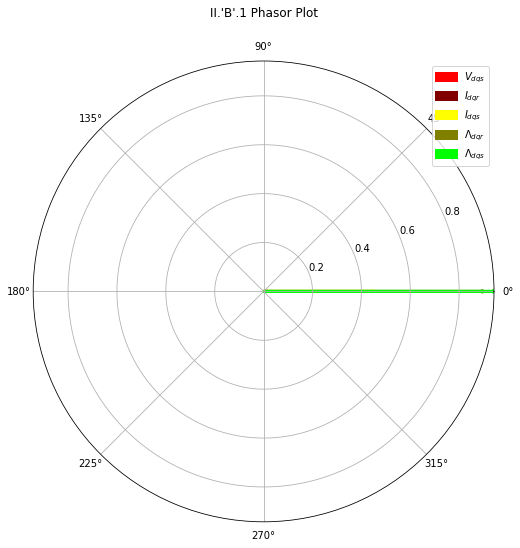

w-slip: 0.0 	w-es 0.9627692050250476


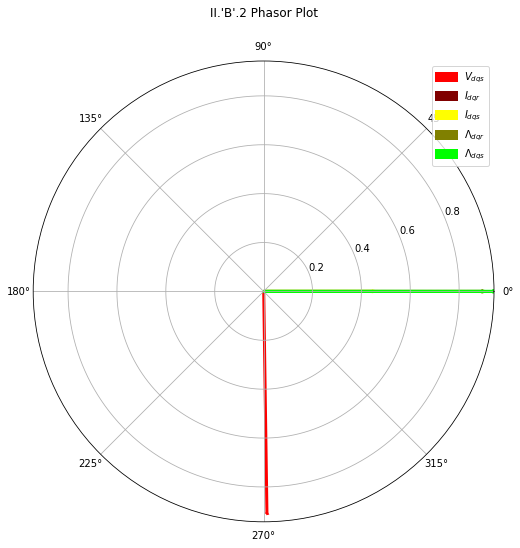

w-slip: 0.0 	w-es 1.9255384100500952


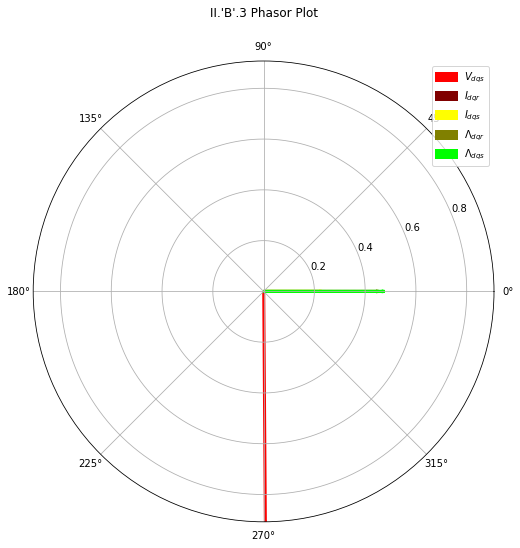

In [4]:
# Define Provided Machine Parameters
rs = 0.03 #pu
LLs = 0.1 #pu
Lm = 2.0 #pu
LLr = 0.1 #pu
rr = 0.03 #pu

# Define Rated Criteria
VdqsMag = 1
wes = 1
Tem = 0

# Calculate Additional Inductance Terms
Ls = LLs + Lm
Lr = LLr + Lm

####################################################
# Read Data Calculated from Problem 1
with open("constants.txt",'r') as file:
    s_rated = float(file.readline())
    w_rated = float(file.readline())
    lamdr_rated = float(file.readline())
print("S-rated:",s_rated,"\tω-rated:",w_rated,"\tLambda-rated:",lamdr_rated)
####################################################

texlabels = [
    "$V_{dqs}$",
    "$I_{dqr}$",
    "$I_{dqs}$",
    "$\\Lambda_{dqr}$",
    "$\\Lambda_{dqs}$",
]
labels = [
    "Vdqs:",
    "Idqr:",
    "Idqs:",
    "λdqr:",
    "λdqs:",
]

######################################################################
# "B".1)
wr = 0.0
LAMdr = lamdr_rated

# Generate Phasor Plot
Vdqs,Idqr,Idqs,LAMdqr,LAMdqs,wslip,wes = ep.imfoc_control(Tem,LAMdr,wr,rr,rs,Lm,LLr,LLs,s_err=0.25)
clist = np.array([Vdqs,Idqr,Idqs,LAMdqr,LAMdqs])
print("w-slip:",wslip,"\tw-es",wes)
clist *= ep.phs(-np.angle(clist[3],deg=True))
ep.phasorplot(clist,"II.'B'.1 Phasor Plot",texlabels,filename="II-B-1",size=8,linewidth=3,plot=debug)

######################################################################
# "B".2)
wr = w_rated
LAMdr = lamdr_rated

# Generate Phasor Plot
Vdqs,Idqr,Idqs,LAMdqr,LAMdqs,wslip,wes = ep.imfoc_control(Tem,LAMdr,wr,rr,rs,Lm,LLr,LLs,s_err=0.25)
clist = np.array([Vdqs,Idqr,Idqs,LAMdqr,LAMdqs])
print("w-slip:",wslip,"\tw-es",wes)
clist *= ep.phs(-np.angle(clist[3],deg=True))
ep.phasorplot(clist,"II.'B'.2 Phasor Plot",texlabels,filename="II-B-2",size=8,linewidth=3,plot=debug)

######################################################################
# "B".3)
wr = 2*w_rated
LAMdr = lamdr_rated/2

# Generate Phasor Plot
Vdqs,Idqr,Idqs,LAMdqr,LAMdqs,wslip,wes = ep.imfoc_control(Tem,LAMdr,wr,rr,rs,Lm,LLr,LLs,s_err=0.25)
clist = np.array([Vdqs,Idqr,Idqs,LAMdqr,LAMdqs])
print("w-slip:",wslip,"\tw-es",wes)
clist *= ep.phs(-np.angle(clist[3],deg=True))
ep.phasorplot(clist,"II.'B'.3 Phasor Plot",texlabels,filename="II-B-3",size=8,linewidth=3,plot=debug)

### Part 'C' (since we're only repeating parts B and C of problem 1):

---

## Comments and Analysis:
From comparison, it seems clear that these results are not too dissimilar from those found in the previous problem (problem I). Perhaps the only truly notable difference is that magnitude difference between the results. Angle differences and general relations between the vectors appear to be largely the same between the Problem I results and these Problem II results.

w-slip: 0.029784635979819975 	w-es 0.029784635979819975


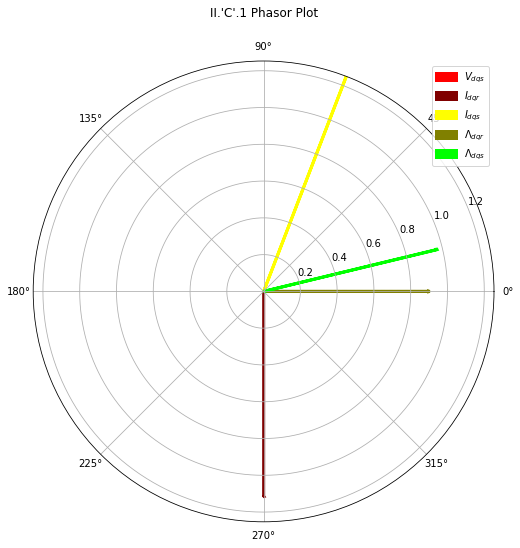

w-slip: 0.029784635979819975 	w-es 0.9925538410048675


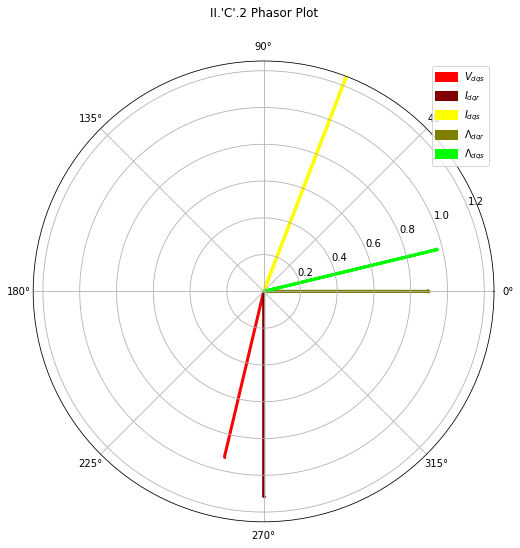

w-slip: 0.05956927195963995 	w-es 1.985107682009735


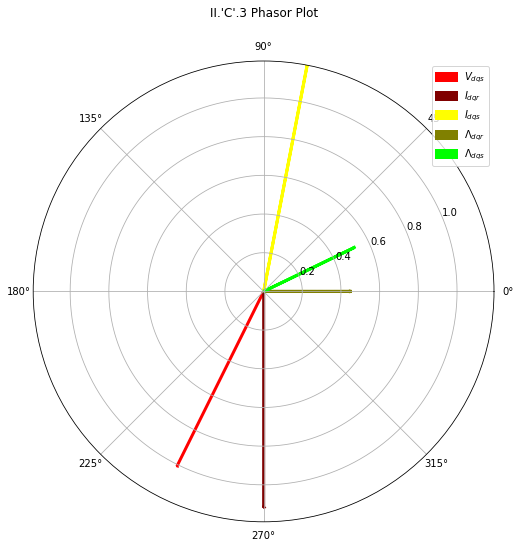

In [6]:
######################################################################
# "C".1)
Tem = 1.0
wr = 0.0
LAMdr = lamdr_rated

# Generate Phasor Plot
Vdqs,Idqr,Idqs,LAMdqr,LAMdqs,wslip,wes = ep.imfoc_control(Tem,LAMdr,wr,rr,rs,Lm,LLr,LLs,s_err=0.25)
clist = np.array([Vdqs,Idqr,Idqs,LAMdqr,LAMdqs])
print("w-slip:",wslip,"\tw-es",wes)
clist *= ep.phs(-np.angle(clist[3],deg=True))
ep.phasorplot(clist,"II.'C'.1 Phasor Plot",texlabels,filename="II-C-1",size=8,linewidth=3,plot=debug)

######################################################################
# "C".2)
Tem = 1.0
wr = w_rated
LAMdr = lamdr_rated

# Generate Phasor Plot
Vdqs,Idqr,Idqs,LAMdqr,LAMdqs,wslip,wes = ep.imfoc_control(Tem,LAMdr,wr,rr,rs,Lm,LLr,LLs,s_err=0.25)
clist = np.array([Vdqs,Idqr,Idqs,LAMdqr,LAMdqs])
print("w-slip:",wslip,"\tw-es",wes)
clist *= ep.phs(-np.angle(clist[3],deg=True))
ep.phasorplot(clist,"II.'C'.2 Phasor Plot",texlabels,filename="II-C-2",size=8,linewidth=3,plot=debug)

######################################################################
# "C".3)
Tem = 0.5
wr = 2*w_rated
LAMdr = lamdr_rated/2

# Generate Phasor Plot
Vdqs,Idqr,Idqs,LAMdqr,LAMdqs,wslip,wes = ep.imfoc_control(Tem,LAMdr,wr,rr,rs,Lm,LLr,LLs,s_err=0.25)
clist = np.array([Vdqs,Idqr,Idqs,LAMdqr,LAMdqs])
print("w-slip:",wslip,"\tw-es",wes)
clist *= ep.phs(-np.angle(clist[3],deg=True))
ep.phasorplot(clist,"II.'C'.3 Phasor Plot",texlabels,filename="II-C-3",size=8,linewidth=3,plot=debug)

# Comments:

We see the same behavior as the first problem!